In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [ ]:
Tp = np.linalg.inv(np.array([
        [ 0.31966, -0.14822,  98.98177],
        [-0.00470,  0.04361, 150.10804],
        [-0.00023, -0.00004,   1.02658]
    ]))

Ts = np.array([
        [2.22183, 0, 0],
        [      0, 1, 0],
        [      0, 0, 1]
    ])

# The perspective correction transform matrix

In [9]:
print(Ts @ Tp)

[[ 5.21211828e+00  1.52134179e+01 -2.72707538e+03]
 [-1.37221408e+00  1.62135307e+01 -2.23845890e+03]
 [ 4.72112167e-04  2.16583992e-03  6.11895338e-01]]


In [3]:
def scale_matrix(sx, sy):
    return np.array([
            [sx,  0, 0],
            [ 0, sy, 0],
            [ 0,  0, 1]
        ])

def translate_matrix(x, y):
    return np.array([
            [1, 0, x],
            [0, 1, y],
            [0, 0, 1]
        ])

In [4]:
img = Image.open('background.png')

In [5]:
Ts1 = scale_matrix(1/5, 1/5)
Tt = translate_matrix(1000, 750)
T = Tt @ Ts1 @ Ts @ Tp
warped = cv2.warpPerspective(np.array(img), T, (2000, 1600))

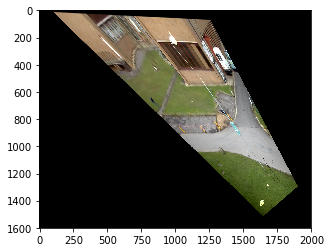

In [6]:
plt.imshow(warped)
plt.show()